<a href="https://colab.research.google.com/github/skhazaei/TensorFlow-repo/blob/master/cats_vs_dogs_CNN_with_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Let's first build the model without Augmentation

In [1]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

--2021-02-13 00:43:01--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.217.15.112, 172.253.62.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   159MB/s    in 0.4s    

2021-02-13 00:43:02 (159 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [2]:
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall('/tmp')
ref_zip.close()

In [3]:
import os

base_dir = os.path.join('/tmp/cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(val_dir,'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs' )

In [4]:
train_cats_name = os.listdir(train_cats_dir)
print (train_cats_name[:5])

['cat.997.jpg', 'cat.752.jpg', 'cat.690.jpg', 'cat.347.jpg', 'cat.206.jpg']


In [5]:
train_dogs_name = os.listdir(train_dogs_dir)
print (train_dogs_name[:5])

['dog.28.jpg', 'dog.275.jpg', 'dog.494.jpg', 'dog.442.jpg', 'dog.708.jpg']


In [6]:
validation_cats_name = os.listdir(validation_cats_dir)
print (validation_cats_name[:5])

['cat.2279.jpg', 'cat.2355.jpg', 'cat.2132.jpg', 'cat.2045.jpg', 'cat.2188.jpg']


In [7]:
validation_dogs_name = os.listdir(validation_dogs_dir)
print (validation_dogs_name[:5])

['dog.2272.jpg', 'dog.2022.jpg', 'dog.2175.jpg', 'dog.2208.jpg', 'dog.2025.jpg']


In [8]:
print ('Total training cat images: {}'.format(len(train_cats_name)))
print ('Total training dog images: {}'.format(len(train_dogs_name)))
print ('Total validation cat images: {}'.format(len(validation_cats_name)))
print ('Total validation dog images: {}'.format(len(validation_dogs_name)))

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500


In [9]:
%matplotlib inline

ncols = 4
nrows = 4

pic_index = 0

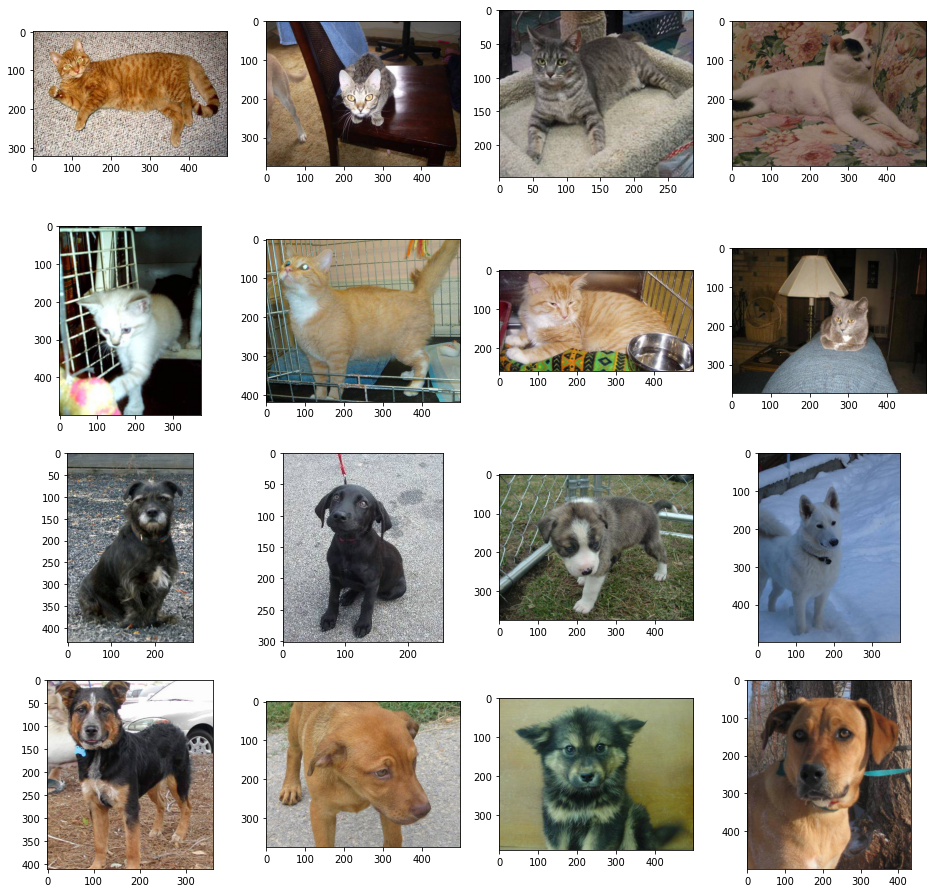

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)

pic_index += 8

next_cat_pic = [os.path.join(train_cats_dir, fname) for fname in train_cats_name[pic_index-8:pic_index]]
next_dog_pic = [os.path.join(train_dogs_dir, fname) for fname in train_dogs_name[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pic + next_dog_pic):
  sp = plt.subplot(nrows, ncols, i + 1)
  #sp.axis('off')
  img = mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

In [24]:
import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ]) 

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [29]:
model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255.)
validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode ='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
history = model.fit_generator(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    validation_steps = 50, # 1000 images = batch_size * steps
    verbose =2
)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 - 8s - loss: 0.6219 - accuracy: 0.6480 - val_loss: 0.5960 - val_accuracy: 0.6870
Epoch 2/100
100/100 - 8s - loss: 0.5910 - accuracy: 0.6815 - val_loss: 0.5717 - val_accuracy: 0.6910
Epoch 3/100
100/100 - 8s - loss: 0.5494 - accuracy: 0.7135 - val_loss: 0.5515 - val_accuracy: 0.7130
Epoch 4/100
100/100 - 8s - loss: 0.5145 - accuracy: 0.7400 - val_loss: 0.5956 - val_accuracy: 0.6870
Epoch 5/100
100/100 - 8s - loss: 0.4934 - accuracy: 0.7585 - val_loss: 0.5523 - val_accuracy: 0.7110
Epoch 6/100
100/100 - 8s - loss: 0.4609 - accuracy: 0.7855 - val_loss: 0.5549 - val_accuracy: 0.7170
Epoch 7/100
100/100 - 8s - loss: 0.4434 - accuracy: 0.7935 - val_loss: 0.5705 - val_accuracy: 0.6990
Epoch 8/100
100/100 - 8s - loss: 0.4189 - accuracy: 0.8145 - val_loss: 0.5328 - val_accuracy: 0.7400
Epoch 9/100
100/100 - 8s - loss: 0.3985 - accuracy: 0.8220 - val_loss: 0.5408 - val_accuracy: 0.7380
Epoch 10/100
100/100 - 8s - loss: 0.3775 - accuracy: 0.8330 - val_loss: 0.5088 - val_accura

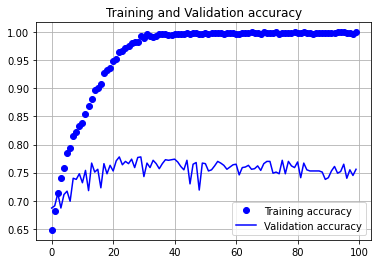

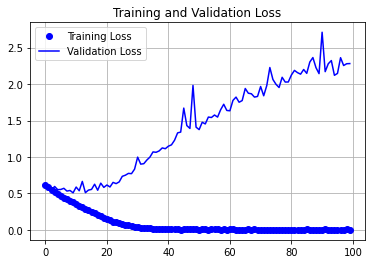

In [39]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.grid()

plt.figure()
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'bo', label ='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.grid()
plt.show()

The Training Accuracy is close to 100%, and the validation accuracy is in the 70%-80% range. This is a great example of overfitting -- which in short means that it can do very well with images it has seen before, but not so well with images it hasn't. Let's see if we can do better to avoid overfitting -- and one simple method is to augment the images a bit. If you think about it, most pictures of a cat are very similar -- the ears are at the top, then the eyes, then the mouth etc. Things like the distance between the eyes and ears will always be quite similar too. 



```
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```
These are just a few of the options available (for more, see the Keras documentation. Let's quickly go over what we just wrote:

* rotation_range is a value in degrees (0–180), a range within which to randomly rotate pictures.
* width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* shear_range is for randomly applying shearing transformations.
* zoom_range is for randomly zooming inside pictures.
* horizontal_flip is for randomly flipping half of the images horizontally. This is relevant when there are no assumptions of horizontal assymmetry (e.g. real-world pictures).
* fill_mode is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.

So Let's try the model with augmentation

In [40]:
!wget --no-check-certificate \
https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
-O /tmp/cats_and_dogs_filtered.zip

import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
ref_zip = zipfile.ZipFile(local_zip, 'r')
ref_zip.extractall('/tmp')
ref_zip.close()


import os

base_dir = os.path.join('/tmp/cats_and_dogs_filtered')

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(val_dir,'cats')
validation_dogs_dir = os.path.join(val_dir, 'dogs' )


train_cats_name = os.listdir(train_cats_dir)
print (train_cats_name[:5])

train_dogs_name = os.listdir(train_dogs_dir)
print (train_dogs_name[:5])

validation_cats_name = os.listdir(validation_cats_dir)
print (validation_cats_name[:5])

validation_dogs_name = os.listdir(validation_dogs_dir)
print (validation_dogs_name[:5])

print ('Total training cat images: {}'.format(len(train_cats_name)))
print ('Total training dog images: {}'.format(len(train_dogs_name)))
print ('Total validation cat images: {}'.format(len(validation_cats_name)))
print ('Total validation dog images: {}'.format(len(validation_dogs_name)))

import tensorflow as tf

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
                                    ]) 

model.summary()

model.compile(optimizer=tf.optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
    )
validation_datagen = ImageDataGenerator(rescale=1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode = 'binary'
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    batch_size = 20,
    target_size = (150, 150),
    class_mode ='binary'
)

history = model.fit_generator(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    steps_per_epoch = 100, # 2000 images = batch_size * steps
    validation_steps = 50, # 1000 images = batch_size * steps
    verbose =2
)


--2021-02-13 01:16:49--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 142.250.73.240, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  76.2MB/s    in 0.9s    

2021-02-13 01:16:50 (76.2 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

['cat.997.jpg', 'cat.752.jpg', 'cat.690.jpg', 'cat.347.jpg', 'cat.206.jpg']
['dog.28.jpg', 'dog.275.jpg', 'dog.494.jpg', 'dog.442.jpg', 'dog.708.jpg']
['cat.2279.jpg', 'cat.2355.jpg', 'cat.2132.jpg', 'cat.2045.jpg', 'cat.2188.jpg']
['dog.2272.jpg', 'dog.2022.jpg', 'dog.2175.jpg', 'dog.2208.jpg', 'dog.2025.jpg']
Total training cat images: 1000
Total training dog images: 1000
Tota

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 - 17s - loss: 0.7060 - accuracy: 0.5005 - val_loss: 0.6755 - val_accuracy: 0.5890
Epoch 2/100
100/100 - 16s - loss: 0.6838 - accuracy: 0.5555 - val_loss: 0.6598 - val_accuracy: 0.6140
Epoch 3/100
100/100 - 16s - loss: 0.6667 - accuracy: 0.5965 - val_loss: 0.6208 - val_accuracy: 0.6740
Epoch 4/100
100/100 - 16s - loss: 0.6462 - accuracy: 0.6175 - val_loss: 0.6078 - val_accuracy: 0.6410
Epoch 5/100
100/100 - 16s - loss: 0.6211 - accuracy: 0.6420 - val_loss: 0.6005 - val_accuracy: 0.6530
Epoch 6/100
100/100 - 16s - loss: 0.6176 - accuracy: 0.6555 - val_loss: 0.5977 - val_accuracy: 0.6830
Epoch 7/100
100/100 - 16s - loss: 0.6033 - accuracy: 0.6810 - val_loss: 0.6149 - val_accuracy: 0.6710
Epoch 8/100
100/100 - 16s - loss: 0.5984 - accuracy: 0.6785 - val_loss: 0.5721 - val_accuracy: 0.6970
Epoch 9/100
100/100 - 16s - loss: 0.5884 - accuracy: 0.6735 - val_loss: 0.5417 - val_accuracy: 0.7260
Epoch 10/100
100/100 - 16s - loss: 0.5826 - accuracy: 0.6905 - val_loss: 0.5450 - 

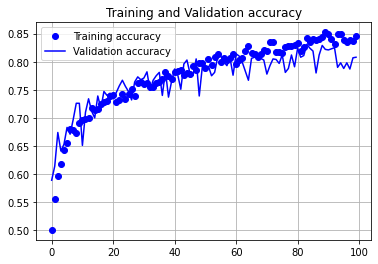

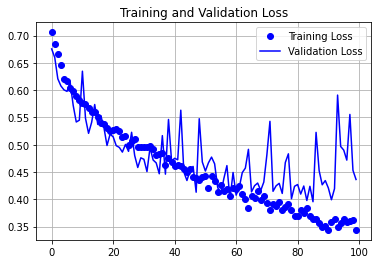

In [41]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.grid()

plt.figure()
plt.title('Training and Validation Loss')
plt.plot(epochs, loss, 'bo', label ='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.grid()
plt.show()